## Import packages

In [109]:
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt
import histogram_module
import dist_module
import match_module
import rpc_module

import importlib
importlib.reload(histogram_module)
importlib.reload(dist_module)
importlib.reload(match_module)
importlib.reload(rpc_module)


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


## Gray-value histograms (Question 2.a)


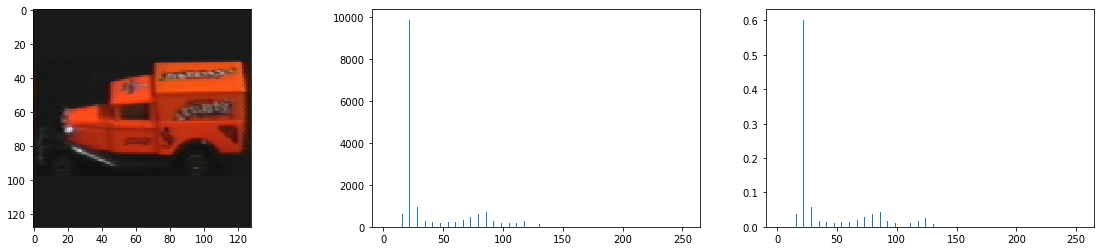

In [74]:
img_color = np.array(Image.open('./model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))
plt.figure(1, figsize=(20,4))
plt.subplot(1,3,1)
plt.imshow(img_color)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = histogram_module.normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)
plt.show()

## More histograms (Question 2.b)

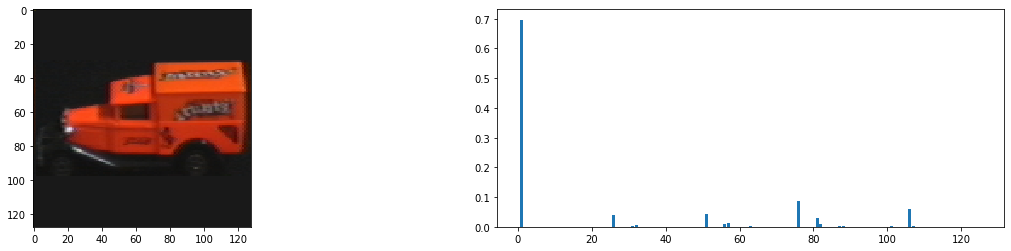

In [75]:
#Compose and test RGB histograms (histogram_module.rgb_hist)
plt.figure(2, figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rgb = histogram_module.rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb.size+1)),hist_rgb)
plt.show()


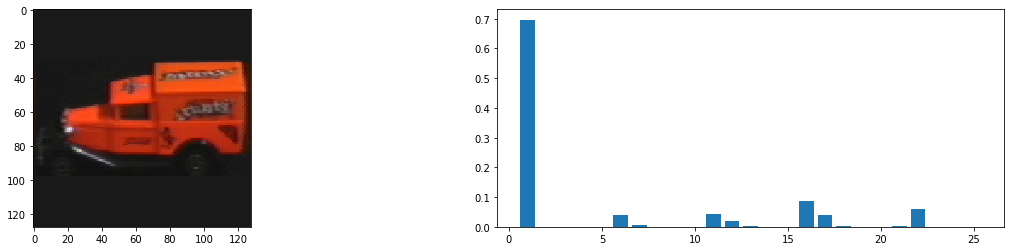

In [76]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3, figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = histogram_module.rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

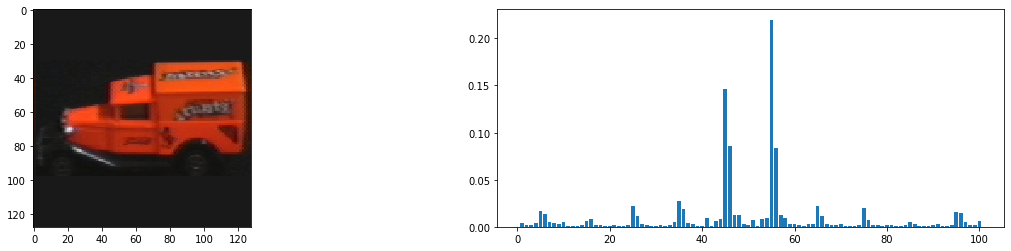

In [113]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)
plt.figure(5, figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = histogram_module.dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

## Distance functions (Question 2.c)

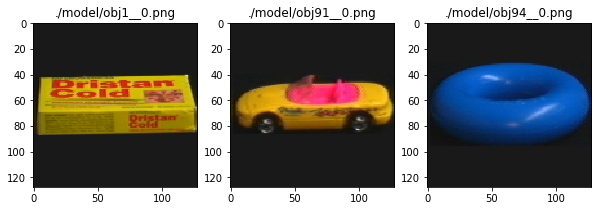

Distance according to dist_l2 0.003344
Distance according to dist_interset 0.294678
Distance according to dist_chi2 0.001302
distance functions: ['l2', 'intersect', 'chi2']
histogram types: ['grayvalue', 'rgb', 'rg', 'dxdy']
Comparison of images "./model/obj1__0.png" to "./model/obj91__0.png":
[[0.00331793 0.00334439 0.00523128 0.0056617 ]
 [0.13391113 0.29467773 0.25396729 0.28448486]
 [0.00131393 0.00130211 0.00198709 0.00245696]]


Comparison of images "./model/obj1__0.png" to "./model/obj94__0.png":
[[0.01713217 0.01517598 0.01668637 0.0054848 ]
 [0.36340332 0.4664917  0.43395996 0.37786865]
 [0.00701917 0.00575112 0.00732778 0.00252665]]


Legend:
l2-grayvalue, l2-rgb, l2-rg, l2-dxdy
intersect-grayvalue, intersect-rgb, intersect-rg, intersect-dxdy
chi2-grayvalue, chi2-rgb, chi2-rg, chi2-dxdy


In [110]:
image_files1 = ['./model/obj1__0.png']
image_files2 = ['./model/obj91__0.png', './model/obj94__0.png']

plt.figure(figsize=(10,20))
plt.subplot(1,3,1); plt.imshow(np.array(Image.open(image_files1[0])), vmin=0, vmax=255); plt.title(image_files1[0])
plt.subplot(1,3,2); plt.imshow(np.array(Image.open(image_files2[0])), vmin=0, vmax=255); plt.title(image_files2[0])
plt.subplot(1,3,3); plt.imshow(np.array(Image.open(image_files2[1])), vmin=0, vmax=255); plt.title(image_files2[1])
plt.show()

img1_color = np.array(Image.open(image_files1[0]))
img2_color = np.array(Image.open(image_files2[0]))
num_bins_color = 30
hist1_rgb = histogram_module.rgb_hist(img1_color.astype('double'), num_bins_color)
hist2_rgb = histogram_module.rgb_hist(img2_color.astype('double'), num_bins_color)

print('Distance according to dist_l2 %f'% dist_module.dist_l2(hist1_rgb,hist2_rgb))
print('Distance according to dist_interset %f'% dist_module.dist_intersect(hist1_rgb,hist2_rgb))
print('Distance according to dist_chi2 %f'% dist_module.dist_chi2(hist1_rgb,hist2_rgb))


distance_types = ['l2', 'intersect', 'chi2']
print('distance functions:', distance_types)

hist_types = ['grayvalue', 'rgb', 'rg', 'dxdy']
print('histogram types:', hist_types)

num_bins_color = 30;
num_bins_gray = 90;

for img1_file in image_files1:
    img1_color = np.array(Image.open(img1_file))
    img1_color = img1_color.astype('double')
    img1_gray = rgb2gray(img1_color)
    
    for img2_file in image_files2:
        img2_color = np.array(Image.open(img2_file))
        img2_color = img2_color.astype('double')
        img2_gray = rgb2gray(img2_color)
    
        D = np.zeros( (len(distance_types),len(hist_types)) )
    
        for didx in range(len(distance_types)):
    
            for hidx in range(len(hist_types)):
    
                if histogram_module.is_grayvalue_hist(hist_types[hidx]):
                    hist1 = histogram_module.get_hist_by_name(img1_gray, num_bins_gray, hist_types[hidx])
                    hist2 = histogram_module.get_hist_by_name(img2_gray, num_bins_gray, hist_types[hidx])
            
                else:
                    hist1 = histogram_module.get_hist_by_name(img1_color, num_bins_color, hist_types[hidx])
                    hist2 = histogram_module.get_hist_by_name(img2_color, num_bins_color, hist_types[hidx])
    
                if len(hist1) == 2:
                    hist1 = hist1[0]
                if len(hist2) == 2:
                    hist2 = hist2[0]
    
                D[didx, hidx] = dist_module.get_dist_by_name(hist1, hist2, distance_types[didx])
         
        print('Comparison of images "%s" to "%s":'% (img1_file, img2_file))
        print(D)
        print('\n')


print('Legend:')
print('%s-%s, %s-%s, %s-%s, %s-%s'%('l2', 'grayvalue', 'l2', 'rgb', 'l2', 'rg', 'l2', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('intersect', 'grayvalue', 'intersect', 'rgb', 'intersect', 'rg', 'intersect', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('chi2', 'grayvalue', 'chi2', 'rgb', 'chi2', 'rg', 'chi2', 'dxdy'))